<a href="https://colab.research.google.com/github/Soumiksb06/LGMVIP/blob/DataScience/Task_01_03_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
songs_data = pd.read_csv('/content/drive/MyDrive/songs.csv')
members_data = pd.read_csv('/content/drive/MyDrive/members.csv')

# Check basic statistics of numerical features
print(train_data.describe())

# Check the first few rows of the data
print(train_data.head())

1    3714656
0    3662762
Name: target, dtype: int64


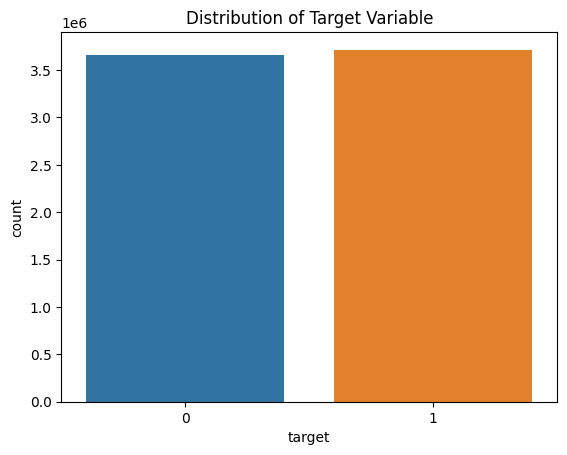

In [ ]:
print(train_data['target'].value_counts())
# Check the distribution of the 'target' variable
sns.countplot(x=train_data['target'])
plt.title('Distribution of Target Variable')
plt.show()

<ipython-input-5-bac90809228d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


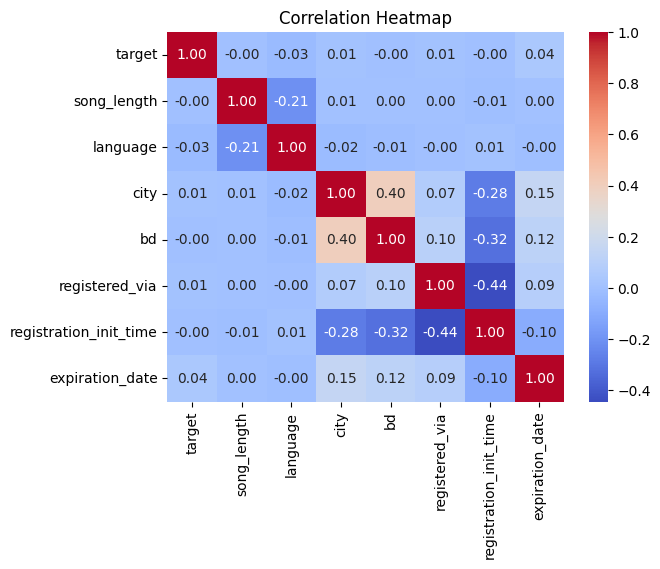

In [ ]:
# Merge data for more comprehensive analysis
merged_data = pd.merge(train_data, songs_data, on='song_id')
merged_data = pd.merge(merged_data, members_data, on='msno')

# Correlation heatmap
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

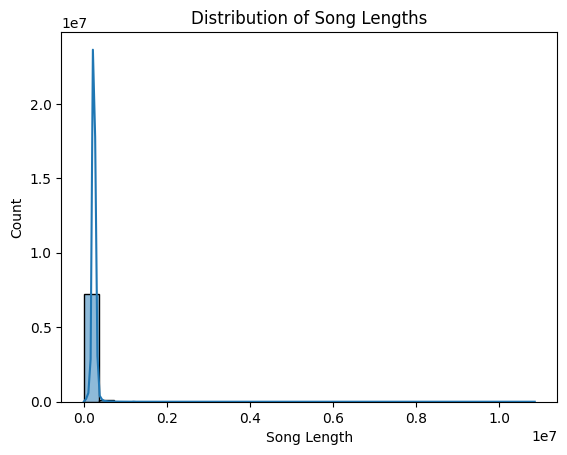

In [ ]:
# Distribution of song lengths
sns.histplot(x=merged_data['song_length'], bins=30, kde=True)
plt.title('Distribution of Song Lengths')
plt.xlabel('Song Length')
plt.show()

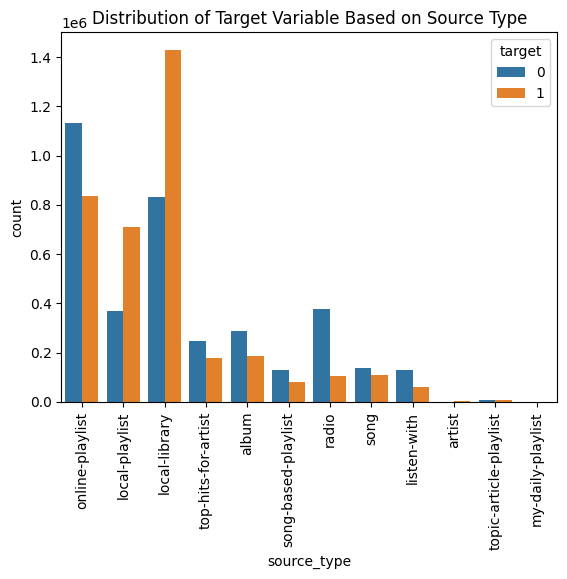

In [ ]:
# Distribution of target variable based on source type
sns.countplot(x='source_type', hue='target', data=train_data)
plt.title('Distribution of Target Variable Based on Source Type')
plt.xticks(rotation=90)
plt.show()

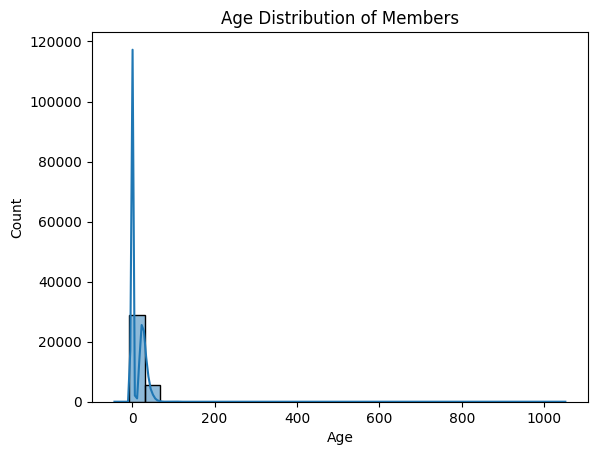

In [ ]:
# Age distribution of members
sns.histplot(members_data['bd'], bins=30, kde=True)
plt.title('Age Distribution of Members')
plt.xlabel('Age')
plt.show()

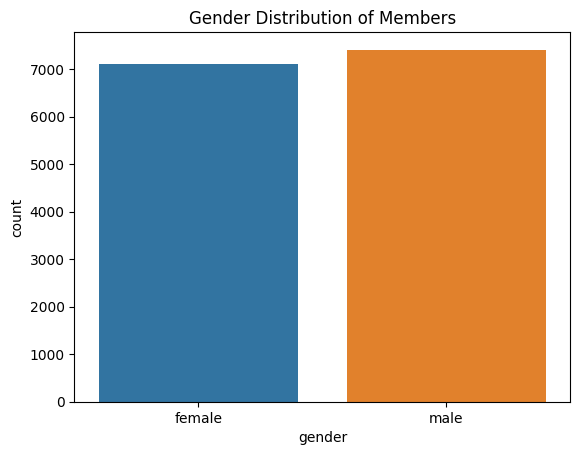

In [ ]:
# Gender distribution of members
sns.countplot(x='gender', data=members_data)
plt.title('Gender Distribution of Members')
plt.show()

# Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
songs_data = pd.read_csv('/content/drive/MyDrive/songs.csv')
members_data = pd.read_csv('/content/drive/MyDrive/members.csv')

# Merge the data
merged_data = pd.merge(train_data, songs_data, on='song_id')

In [11]:
merged_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,hKdGiUKHVqKkXGHLrc+EzdSW6q0ERAJ2Cs7/L1N0Ae4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,NaN,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7377299,wCGT5Nb+vL9GXEZ87Kp8BAqFOVZugZSxG1706efctMU=,FmdO/4DNXqJWwA0FH2LEdvy/WuUU/Aq2DKlbFvQT6oY=,discover,Discover Genre,album,0,397479,2079,Chaandanee,Chaandanee,Chaandanee,52.0
7377300,wCGT5Nb+vL9GXEZ87Kp8BAqFOVZugZSxG1706efctMU=,qzY5KBI8QBg1fs/qrhNm1KLe7lVbjYRbNtA595gl9vQ=,discover,Discover Genre,album,0,420911,2079,Chaandanee,Chaandanee,Chaandanee,52.0
7377301,OHw2qQArWtGlk/gthkEt8WmDnx/1SxLgeqXisMzhHyM=,SZZUaT+kWlIDkjgJqK5VJls94gArFT1BgkrFLjvJVIc=,my library,Online playlist more,online-playlist,0,226348,958,Francis Goya,Wallux| F.Weyer,NaN,-1.0
7377302,AkvLFGpB1EDBAQBa1xgCq3hq8hoFRsV+AO0ezHdCVN4=,7+DNPp8HiFDXlQmNejGezfdJ15eXGms1PmRCwtc+zVQ=,discover,Online playlist more,song-based-playlist,1,198949,465,Salvina y Miren al Lobo,NaN,NaN,52.0


In [26]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163751 sha256=9fa201d13fc5b221c8e9ed223d13255f66d6b5bc6660f86b1c84745563d68845
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=4ce0c0072cb521233db3a8a7736d4fa66b0b2b5f11b250ca53163d5e663cbc24
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
# Declare an empty DataFrame with columns
columns = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target',
           'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']

merged_data2 = pd.DataFrame(columns=columns)

# Encode categorical features
label_encoder = LabelEncoder()
merged_data2['msno'] = label_encoder.fit_transform(merged_data['msno'])
merged_data2['song_id'] = label_encoder.fit_transform(merged_data['song_id'])
merged_data2['genre_ids'] = label_encoder.fit_transform(merged_data['genre_ids'])
merged_data2['artist_name'] = label_encoder.fit_transform(merged_data['artist_name'])
merged_data2['composer'] = label_encoder.fit_transform(merged_data['composer'])
merged_data2['lyricist'] = label_encoder.fit_transform(merged_data['lyricist'])
merged_data2['target'] = label_encoder.fit_transform(merged_data['target'])

In [3]:
merged_data2.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,8158,74668,NaN,NaN,NaN,1,NaN,285,3277,14581,33888,NaN
1,20289,74668,NaN,NaN,NaN,1,NaN,285,3277,14581,33888,NaN
2,25914,74668,NaN,NaN,NaN,0,NaN,285,3277,14581,33888,NaN
3,27238,74668,NaN,NaN,NaN,0,NaN,285,3277,14581,33888,NaN
4,21813,74668,NaN,NaN,NaN,0,NaN,285,3277,14581,33888,NaN


In [4]:
merged_data2=merged_data2.drop(columns=['source_system_tab', 'source_screen_name', 'source_type','song_length','language'])

In [5]:
merged_data2.head()

,msno,song_id,target,genre_ids,artist_name,composer,lyricist
0,8158,74668,1,285,3277,14581,33888
1,20289,74668,1,285,3277,14581,33888
2,25914,74668,0,285,3277,14581,33888
3,27238,74668,0,285,3277,14581,33888
4,21813,74668,0,285,3277,14581,33888


In [13]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Taking a subset of the dataset to reduce memory usage
subset_data = merged_data2.sample(n=100000, random_state=42)

# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(0, 1))
dataset = Dataset.load_from_df(subset_data[['msno', 'song_id', 'target']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Build the collaborative filtering model using SVD (Singular Value Decomposition)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 0.4936


0.4936104448388014

In [14]:
# Function to get song recommendations for a user
def get_top_n_recommendations(user_id, n=10):
    # Get all songs the user has not listened to yet
    user_songs = merged_data2[merged_data2['msno'] == user_id]['song_id'].unique()
    all_songs = merged_data2['song_id'].unique()
    songs_to_predict = list(set(all_songs) - set(user_songs))

    # Make predictions for the user on the remaining songs
    user_predictions = [model.predict(user_id, song_id) for song_id in songs_to_predict]

    # Sort predictions by estimated rating
    sorted_predictions = sorted(user_predictions, key=lambda x: x.est, reverse=True)

    # Get top N recommendations
    top_n_recommendations = sorted_predictions[:n]

    # Extract song IDs from recommendations
    recommended_song_ids = [prediction.iid for prediction in top_n_recommendations]

    return recommended_song_ids

# Example: Get top 5 recommendations for user with msno = 8158
user_id_to_recommend = 8158
recommendations = get_top_n_recommendations(user_id_to_recommend, n=5)
print(f"Top 5 song recommendations for user {user_id_to_recommend}: {recommendations}")

Top 5 song recommendations for user 8158: [7297, 29891, 52904, 59064, 68557]
